<a href="https://colab.research.google.com/github/shashi3876/data-wrangling/blob/main/Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Load the file into a DataFrame
data = pd.read_csv('adult.data', header=None, names=column_names)

# Print the first few rows of the DataFrame
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
data['age'] = data['age'].astype(int)
data['education-num'] = data['education-num'].astype(int)


In [3]:
print(data['income'].unique())

[' <=50K' ' >50K']


In [4]:
data=data.drop(['fnlwgt'], axis=1)

# Method 1: Visual Inspection

Easiest way to find out which features are important for the classification task is to visually inspect them using scatter plots, bar plots, or violin plots.

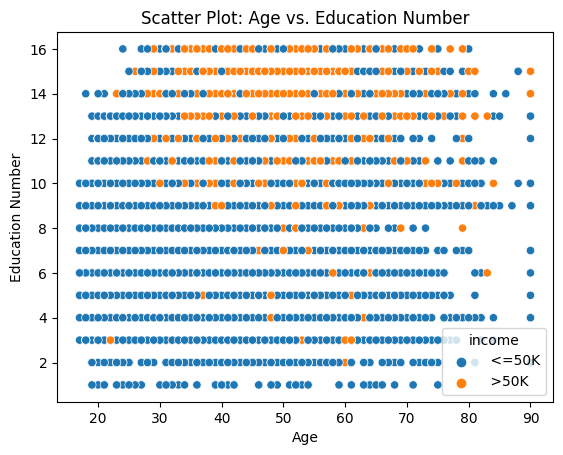

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with varying colors
sns.scatterplot(x='age', y='education-num', hue='income', data=data)
plt.xlabel('Age')
plt.ylabel('Education Number')
plt.title('Scatter Plot: Age vs. Education Number')
plt.show()

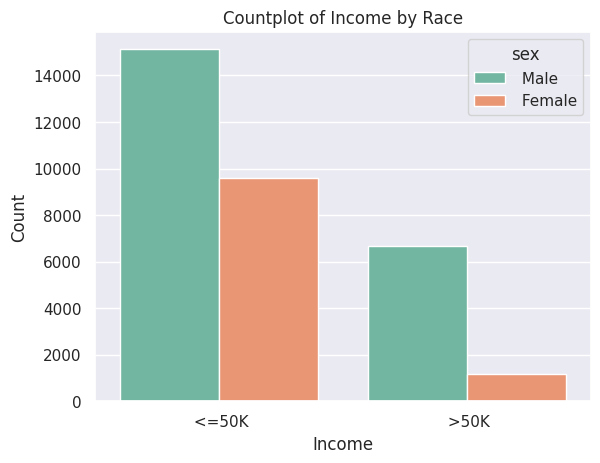

In [6]:
# Set the style of the plot
sns.set(style="darkgrid")

# Create the countplot
sns.countplot(x='income', hue='sex', data=data, palette='Set2')

# Set the labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Countplot of Income by Race')

# Show the plot
plt.show()

As evident from the above plot, the distribution of males and females differs across the two target classes. Thus, we can conclude that the 'sex' feature has an impact on the classification problem. However, the above observations are qualitative and not quantifiable metrics. Therefore, let's explore more analytical methods to determine the feature importances.

## Method 2: Feature Importance with Tree based models

Another approach to identify feature importance in the adult dataset is by utilizing tree based models. Here we use the Random Forest Classifier. Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It is well-suited for feature importance analysis due to its ability to measure the impact of each feature on the classification outcome.

To implement this method, we employ the Random Forest Classifier from the scikit-learn library. We fit the classifier to the adult dataset, using the target variable 'income' and all available features except the education (we remove it as it is also a duplication of education-num). The Random Forest algorithm evaluates the importance of each feature by considering how much the prediction accuracy decreases when a particular feature is randomly shuffled. The resulting feature importances indicate the relative contribution of each feature to the classification task.

By sorting the feature importances in descending order, we can identify the top features that have the most significant impact on the classification outcome. This information can provide valuable insights into the dataset and aid in feature selection for the classification task in the adult dataset. However, as some of the features are categorical, we have to encode them. Then when calculating the importance, we have to convert them back to original features.

In [7]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming your DataFrame is called 'df' with the target variable 'income' and features

# Separate the features and target
X = data.drop(['income','education'], axis=1)
y = data['income']

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X)

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the classifier on the encoded data
rf.fit(X_encoded, y)

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

# Map the importance values to the original feature names
feature_importances['Original Feature'] = feature_importances['Feature'].str.split('_').str[0]

# Aggregate the importance values by the original feature names
feature_importances_agg = feature_importances.groupby('Original Feature')['Importance'].sum().reset_index()

# Sort the features based on importance
feature_importances_agg = feature_importances_agg.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_agg)

   Original Feature  Importance
0               age    0.223972
3     education-num    0.130015
4    hours-per-week    0.112157
1      capital-gain    0.111747
5    marital-status    0.103569
7        occupation    0.091870
9      relationship    0.086055
11        workclass    0.041539
2      capital-loss    0.035970
6    native-country    0.027951
10              sex    0.018049
8              race    0.017107


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is called 'df' with the target variable 'income' and features

# Separate the features and target
X = data.drop(['income','education'], axis=1)
y = data['income']

# Label encode the categorical features
X_encoded = X.copy()
for feature in X.columns:
    if X[feature].dtype == 'object':
        label_encoder = LabelEncoder()
        X_encoded[feature] = label_encoder.fit_transform(X[feature])

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the classifier on the encoded data
rf.fit(X_encoded, y)

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features based on importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

           Feature  Importance
0              age    0.215155
2    education-num    0.138108
8     capital-gain    0.127977
5     relationship    0.123232
10  hours-per-week    0.109629
4       occupation    0.084163
3   marital-status    0.059387
1        workclass    0.049712
9     capital-loss    0.039374
11  native-country    0.021711
6             race    0.018108
7              sex    0.013442


## Method 3: Feature Importance with Catboost

Instead of tree based models, we can use boosting methods to find the feature importance. Here, we use catboost as it can easily handle categorical variables.

In [9]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.1 MB/s eta 0:00:00


In [10]:
from catboost import CatBoostClassifier

# Separate the features and target
X = data.drop(['income','education-num'], axis=1)
y = data['income']

# Identify the categorical features in the DataFrame
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Create a CatBoostClassifier
catboost = CatBoostClassifier(random_state=42, verbose=False)

# Fit the classifier on the data
catboost.fit(X, y, cat_features=categorical_features)

# Get the feature importances
importances = catboost.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features based on importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

           Feature  Importance
8     capital-gain   22.329145
5     relationship   17.562647
0              age   12.216508
3   marital-status    9.126349
9     capital-loss    8.536206
10  hours-per-week    8.416661
2        education    7.856034
4       occupation    7.219433
1        workclass    2.572715
7              sex    1.739499
6             race    1.222041
11  native-country    1.202762


## Method 4: Permutation Importance

In [11]:
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

# Separate the features and target
X = data.drop(['income','education'], axis=1)
y = data['income']

# Label encode the categorical features
X_encoded = X.copy()
for feature in X.columns:
    if X[feature].dtype == 'object':
        label_encoder = LabelEncoder()
        X_encoded[feature] = label_encoder.fit_transform(X[feature])

# Create a classifier (e.g., Decision Tree Classifier)
clf = DecisionTreeClassifier()

# Fit the classifier on the data
clf.fit(X_encoded, y)

# Calculate permutation importances
results = permutation_importance(clf, X_encoded, y, scoring='accuracy', random_state=42)

# Get the feature importances
importances = results.importances_mean

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features based on importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

           Feature  Importance
0              age    0.153736
5     relationship    0.153091
2    education-num    0.142213
4       occupation    0.122742
10  hours-per-week    0.112503
1        workclass    0.062111
8     capital-gain    0.060662
3   marital-status    0.033064
9     capital-loss    0.021646
6             race    0.019551
11  native-country    0.014932
7              sex    0.013446


However, using all three of the above methods may seem counterintuitive in some sense. This is because these methods involve training a model first and then calculating the importance of features based on that model. In the context of feature selection, it might be preferable to explore methods that do not require training a model to determine feature importance. Let's now explore some alternative approaches that provide feature importance without the need for model training.

## Method 5: Univariate statistical tests


In [13]:
from scipy.stats import chi2_contingency, f_oneway
import numpy as np

# Separate the features and target
X = data.drop('income', axis=1)
y = data['income']

# Univariate statistical tests for categorical features (chi-square test)
categorical_features = X.select_dtypes(include='object').columns
chi2_scores = []
p_values = []
for feature in categorical_features:
    contingency_table = pd.crosstab(X[feature], y)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p_value)

categorical_results = pd.DataFrame({'Feature': categorical_features, 'Chi2 Score': chi2_scores, 'P-value': p_values})
categorical_results = categorical_results.sort_values(by='P-value')

# Univariate statistical tests for numerical features (ANOVA)
numerical_features = X.select_dtypes(include=np.number).columns
f_scores = []
p_values = []
for feature in numerical_features:
    groups = [X.loc[y == c, feature] for c in np.unique(y)]
    f, p_value = f_oneway(*groups)
    f_scores.append(f)
    p_values.append(p_value)

numerical_results = pd.DataFrame({'Feature': numerical_features, 'F-score': f_scores, 'P-value': p_values})
numerical_results = numerical_results.sort_values(by='P-value')

# Print the results
print("Categorical Features:")
print(categorical_results)
print("\nNumerical Features:")
print(numerical_results)


Categorical Features:
          Feature   Chi2 Score        P-value
1       education  4429.653302   0.000000e+00
2  marital-status  6517.741654   0.000000e+00
3      occupation  4031.974280   0.000000e+00
4    relationship  6699.076897   0.000000e+00
6             sex  1517.813409   0.000000e+00
0       workclass  1045.708600  2.026505e-220
5            race   330.920431   2.305961e-70
7  native-country   317.230386   2.211386e-44

Numerical Features:
          Feature      F-score        P-value
0             age  1886.707314   0.000000e+00
1   education-num  4120.095780   0.000000e+00
2    capital-gain  1709.150064   0.000000e+00
4  hours-per-week  1813.386282   0.000000e+00
3    capital-loss   754.830452  2.686547e-164


According to the analysis, it is observed that among the categorical features, education and marital status exhibit higher importance. Similarly, age and education-num are identified as more important among the numerical features. In contrast to the previous three methods, this approach does not require model fitting to determine feature importances. Instead, it relies solely on statistical analysis. Therefore, this method is advantageous when a mathematically-driven solution is sought, as it provides insights based on statistical measures.

#Conclusion

This post has presented five effective methods for identifying feature importance in a classification problem. The methods discussed include visual inspection, forest-based methods, boosting-based methods, permutation importance, and univariate analysis.

Visual inspection provides a quick and intuitive way to visually analyze the relationship between features and the target variable. Forest-based methods, such as Random Forest, offer a robust ensemble approach that calculates feature importance based on the underlying decision trees. Boosting-based methods, like XGBoost and CatBoost, leverage gradient boosting algorithms to estimate feature importance with enhanced predictive power. Permutation importance offers a model-agnostic approach that assesses the impact of shuffling feature values on the model's performance. Univariate analysis involves applying statistical tests, such as chi-square or ANOVA, to quantify the relationship between each feature and the target variable.

By utilizing these diverse approaches, data scientists can gain valuable insights into the importance of different features in their classification tasks. The choice of method depends on the specific requirements, available data, and desired interpretability. It is recommended to explore multiple methods and consider the strengths and limitations of each in order to obtain a comprehensive understanding of feature importance. Ultimately, selecting and prioritizing relevant features contributes to improved model performance and better decision-making in classification problems.